# Task 03 – Decision Tree Classifier (Bank Marketing-style)

Accuracy: 0.8775848722768993

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7985
           1       0.48      0.50      0.49      1058

    accuracy                           0.88      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043


Confusion Matrix:
 [[7408  577]
 [ 530  528]]


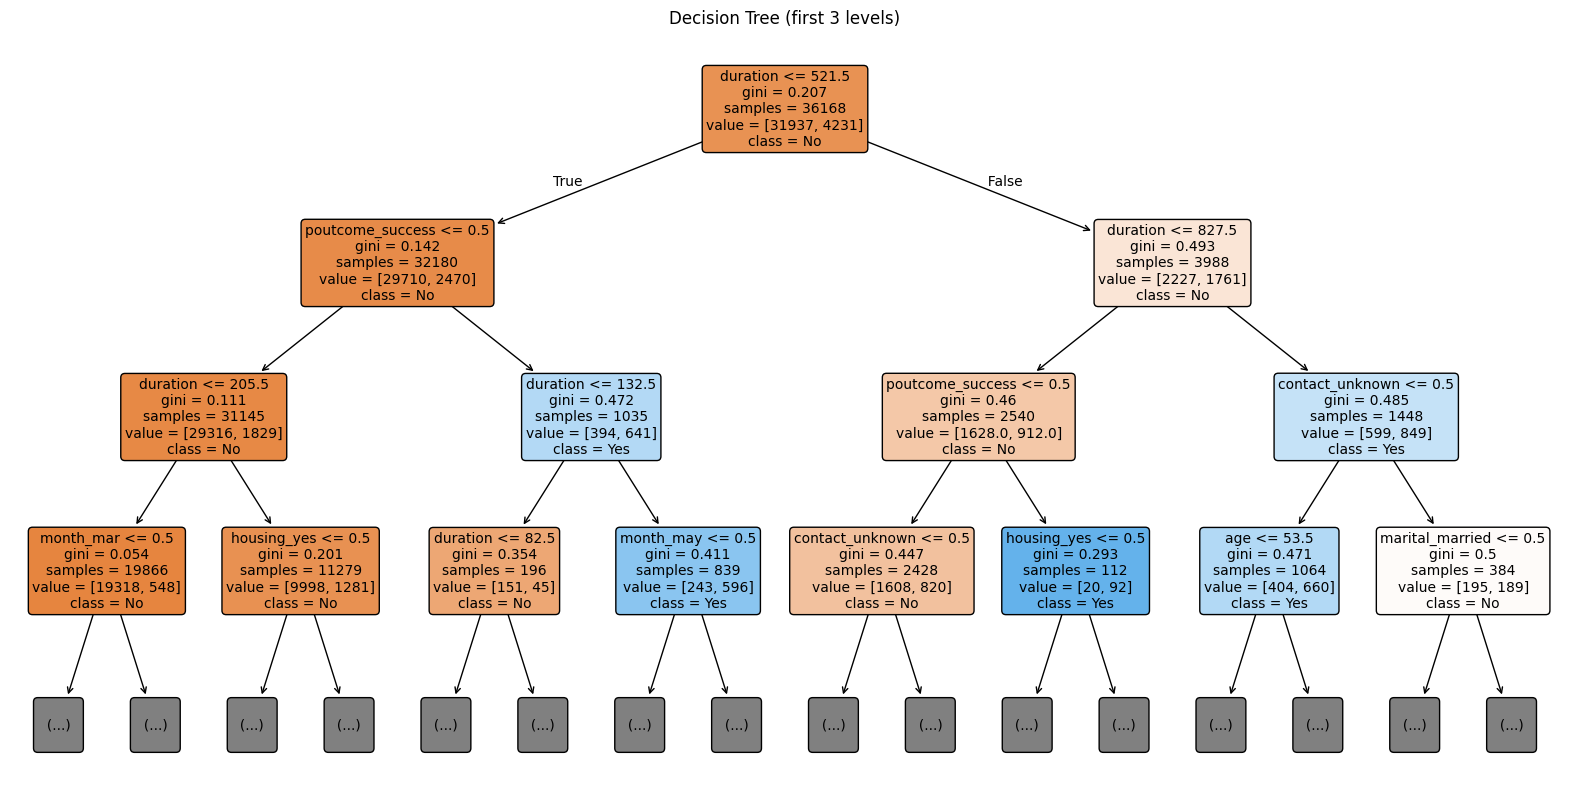

In [15]:
# 1. Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 2. Load the dataset
# Replace with the correct path to your CSV, e.g., 'bank-full.csv' or 'bank-additional-full.csv'
df = pd.read_csv(r'C:\Users\kurab\OneDrive\Pictures\Documents\bank-full.csv', sep=';')

# 3. Preprocessing
# Convert target to binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Separate features and target
X = df.drop(columns=['y'])
y = df['y']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# 4. Split into train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Build and train the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# 6. Evaluate the model
y_pred = dtc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 7. Visualize the Decision Tree (pruned for clarity)
plt.figure(figsize=(20, 10))
plot_tree(
    dtc,
    max_depth=3,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (first 3 levels)")
plt.show()
